# Telcom-Customer-Churn-Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve
from sklearn.tree import plot_tree

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

In [2]:
telco_base_data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
telco_base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
telco_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
telco_base_data.shape

(7043, 21)

In [6]:
telco_base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [7]:
telco_base_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
#replacing 
# Check the data types after conversion
telco_base_data.TotalCharges = telco_base_data.TotalCharges.replace(" ",np.nan)
telco_base_data.TotalCharges.fillna(0, inplace = True)
telco_base_data.TotalCharges = telco_base_data.TotalCharges.astype(float)

In [9]:
telco_base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
telco_base_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# EDA

In [11]:
telco_base_data.drop(['customerID'],inplace = True, axis = 1)

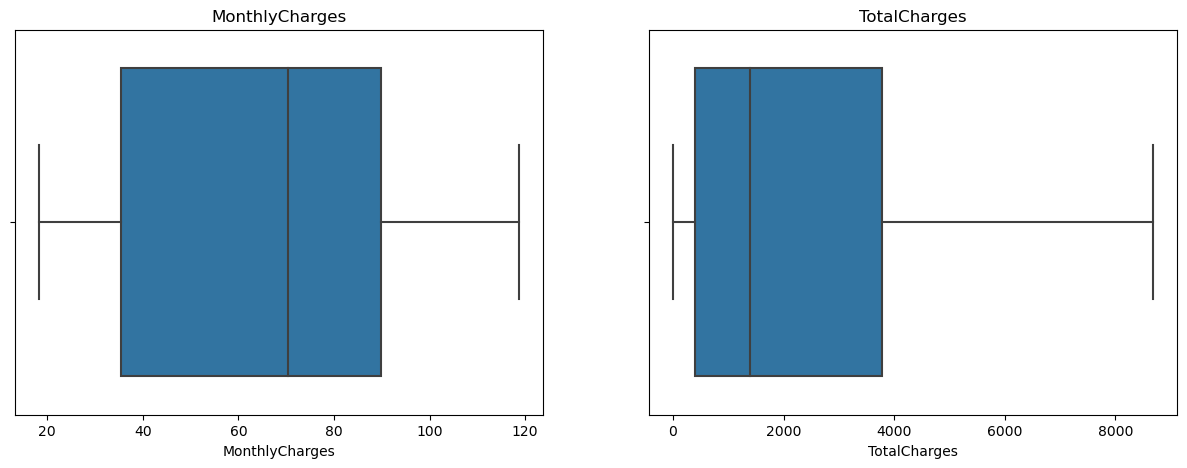

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Boxplot for MonthlyCharges
sns.boxplot(x=telco_base_data['MonthlyCharges'], ax=axes[0])
axes[0].set_title('MonthlyCharges')

# Boxplot for  TotalCharges
sns.boxplot(x=telco_base_data['TotalCharges'], ax=axes[1])
axes[1].set_title('TotalCharges')


plt.show()


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_countplot_with_labels(data, x, hue, title, xlabel, ylabel, legend_title, ax=None):
    if ax is None:
        fig, ax = plt.subplots()

    # Create a count plot
    sns.countplot(data=data, x=x, hue=hue, ax=ax)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(title=legend_title, loc='upper right')

    # Add labels to the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')




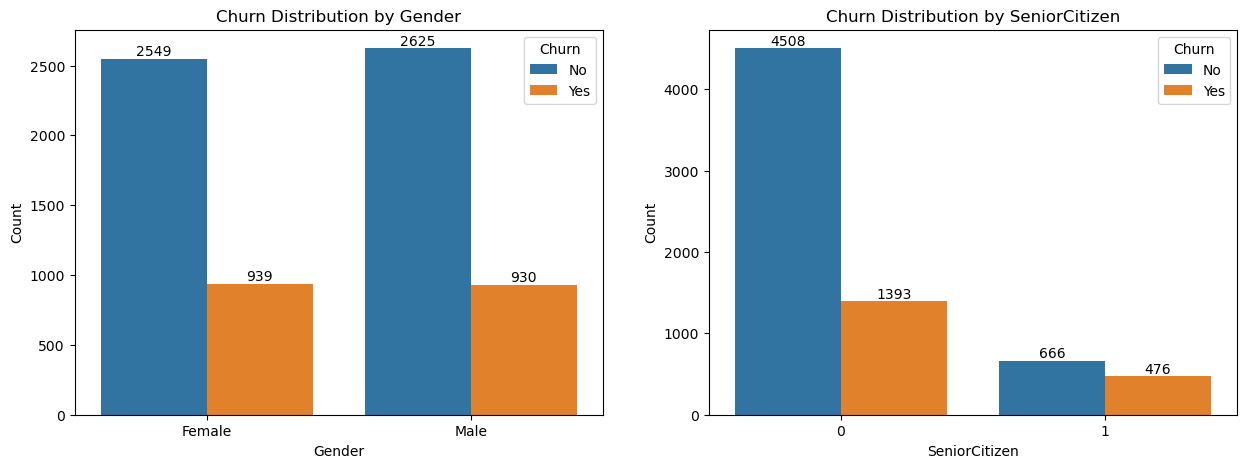

In [14]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for 'Gender'
plot_countplot_with_labels(telco_base_data, 
                           'gender', 'Churn', 
                           'Churn Distribution by Gender', 'Gender', 
                           'Count', 'Churn', ax=axes[0])

# Plot for 'SeniorCitizen'
plot_countplot_with_labels(telco_base_data, 
                           'SeniorCitizen', 'Churn', 
                           'Churn Distribution by SeniorCitizen', 
                           'SeniorCitizen', 'Count', 'Churn', ax=axes[1])

plt.show()

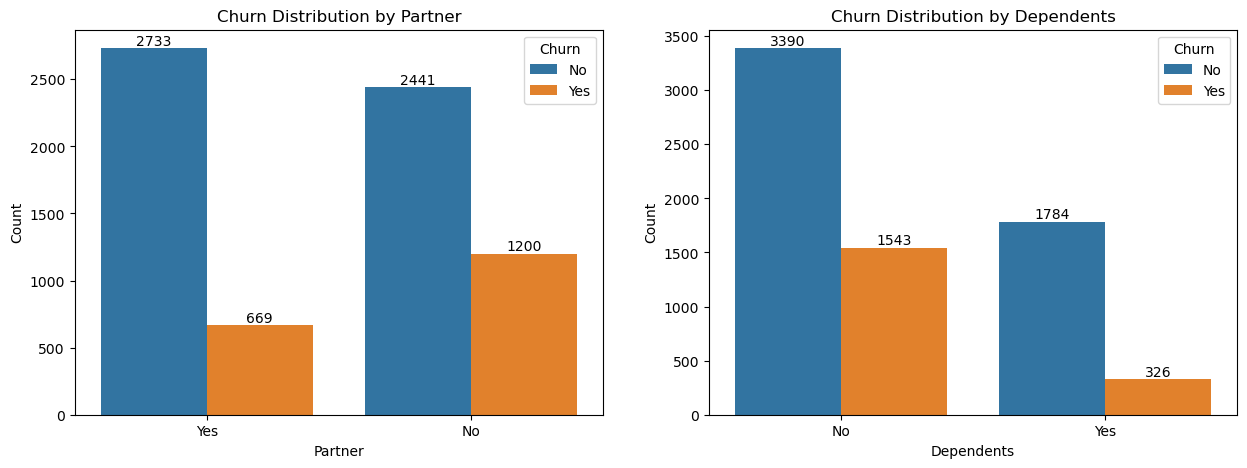

In [15]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for 'Partner'
plot_countplot_with_labels(telco_base_data, 
                           'Partner', 'Churn', 
                           'Churn Distribution by Partner', 'Partner', 
                           'Count', 'Churn', ax=axes[0])

# Plot for 'Dependents'
plot_countplot_with_labels(telco_base_data, 
                           'Dependents', 'Churn', 
                           'Churn Distribution by Dependents', 
                           'Dependents', 'Count', 'Churn', ax=axes[1])

plt.show()

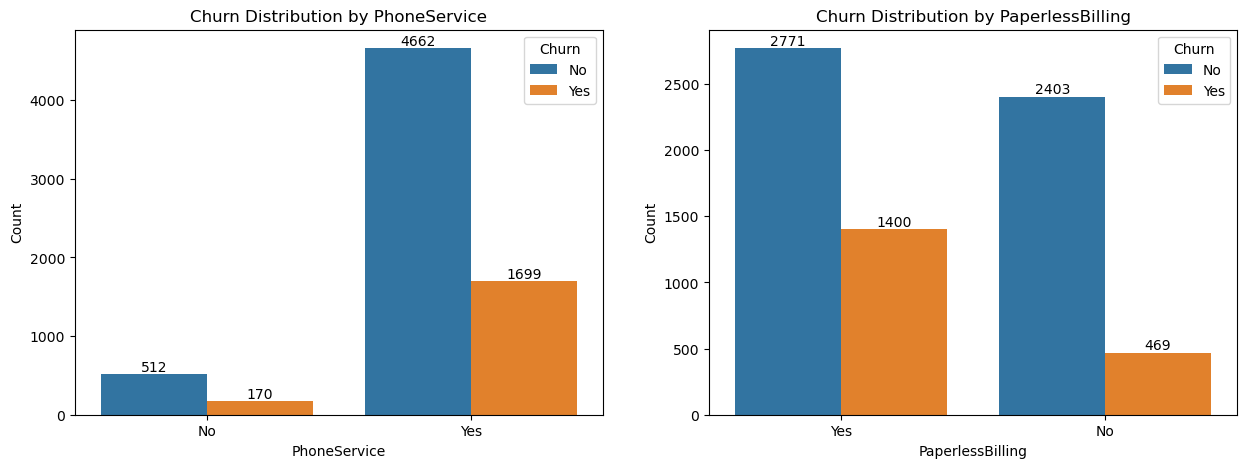

In [16]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for 'PhoneService'
plot_countplot_with_labels(telco_base_data, 
                           'PhoneService', 'Churn', 
                           'Churn Distribution by PhoneService', 
                           'PhoneService','Count', 'Churn', ax=axes[0])


# Plot for 'PaperlessBilling'
plot_countplot_with_labels(telco_base_data, 
                           'PaperlessBilling', 'Churn', 
                           'Churn Distribution by PaperlessBilling', 
                           'PaperlessBilling', 'Count', 'Churn', ax=axes[1])

plt.show()

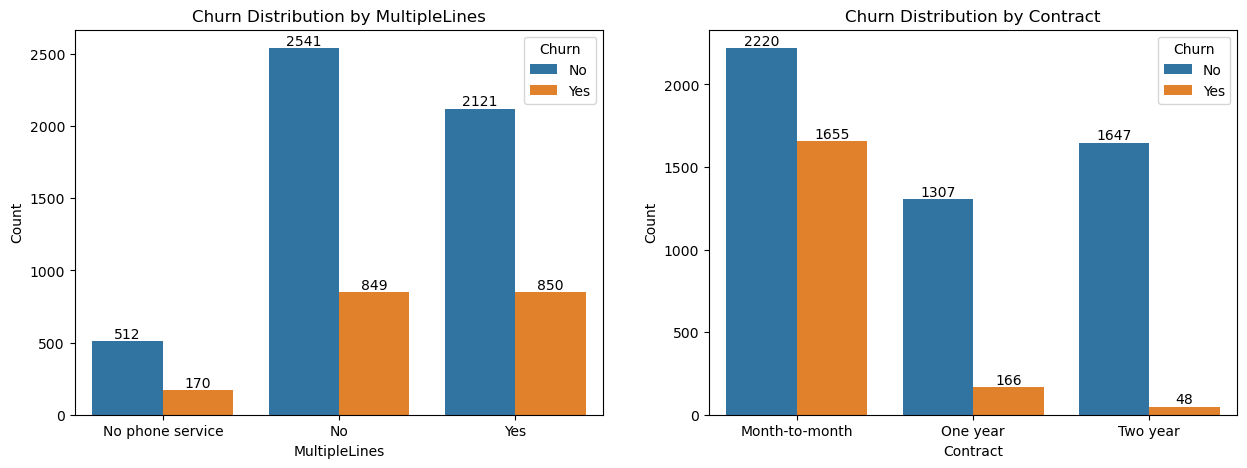

In [17]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for 'MultipleLines'
plot_countplot_with_labels(telco_base_data, 
                           'MultipleLines', 'Churn', 
                           'Churn Distribution by MultipleLines', 
                           'MultipleLines', 'Count', 'Churn', ax=axes[0])


# Plot for 'Contract'
plot_countplot_with_labels(telco_base_data, 
                           'Contract', 'Churn', 
                           'Churn Distribution by Contract', 
                           'Contract', 'Count', 'Churn', ax=axes[1])

plt.show()

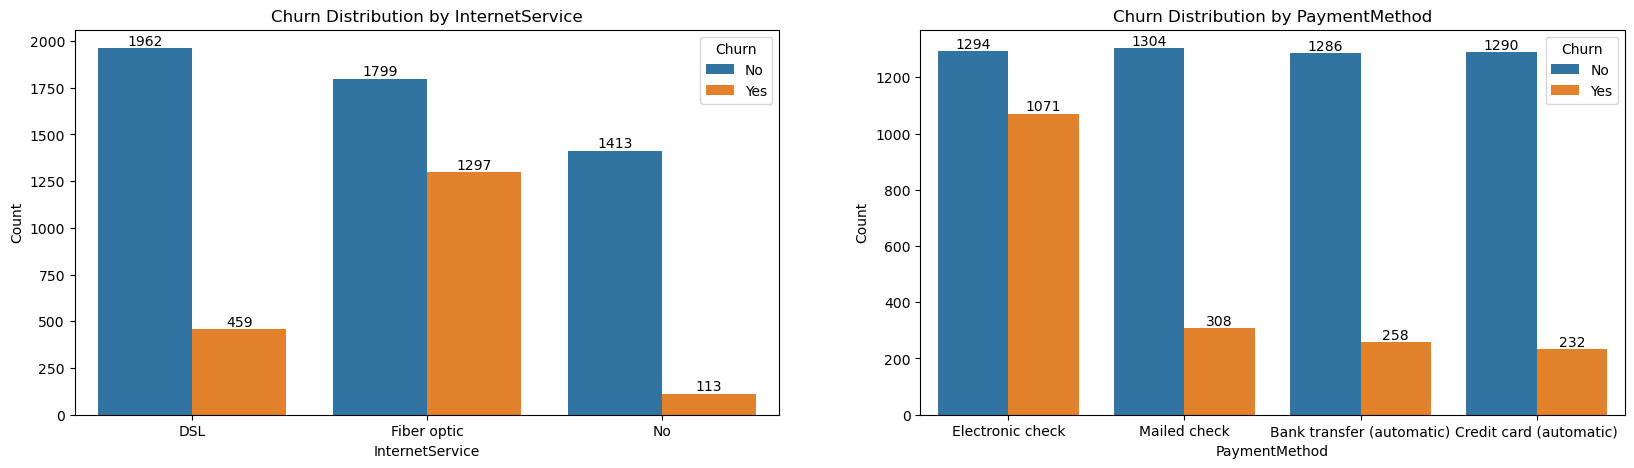

In [18]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Plot for 'InternetService'
plot_countplot_with_labels(telco_base_data, 
                           'InternetService', 'Churn', 
                           'Churn Distribution by InternetService', 
                           'InternetService', 'Count', 'Churn', ax=axes[0])


# Plot for 'PaymentMethod'
plot_countplot_with_labels(telco_base_data, 
                           'PaymentMethod', 'Churn', 
                           'Churn Distribution by PaymentMethod', 
                           'PaymentMethod', 'Count', 'Churn', ax=axes[1])

plt.show()

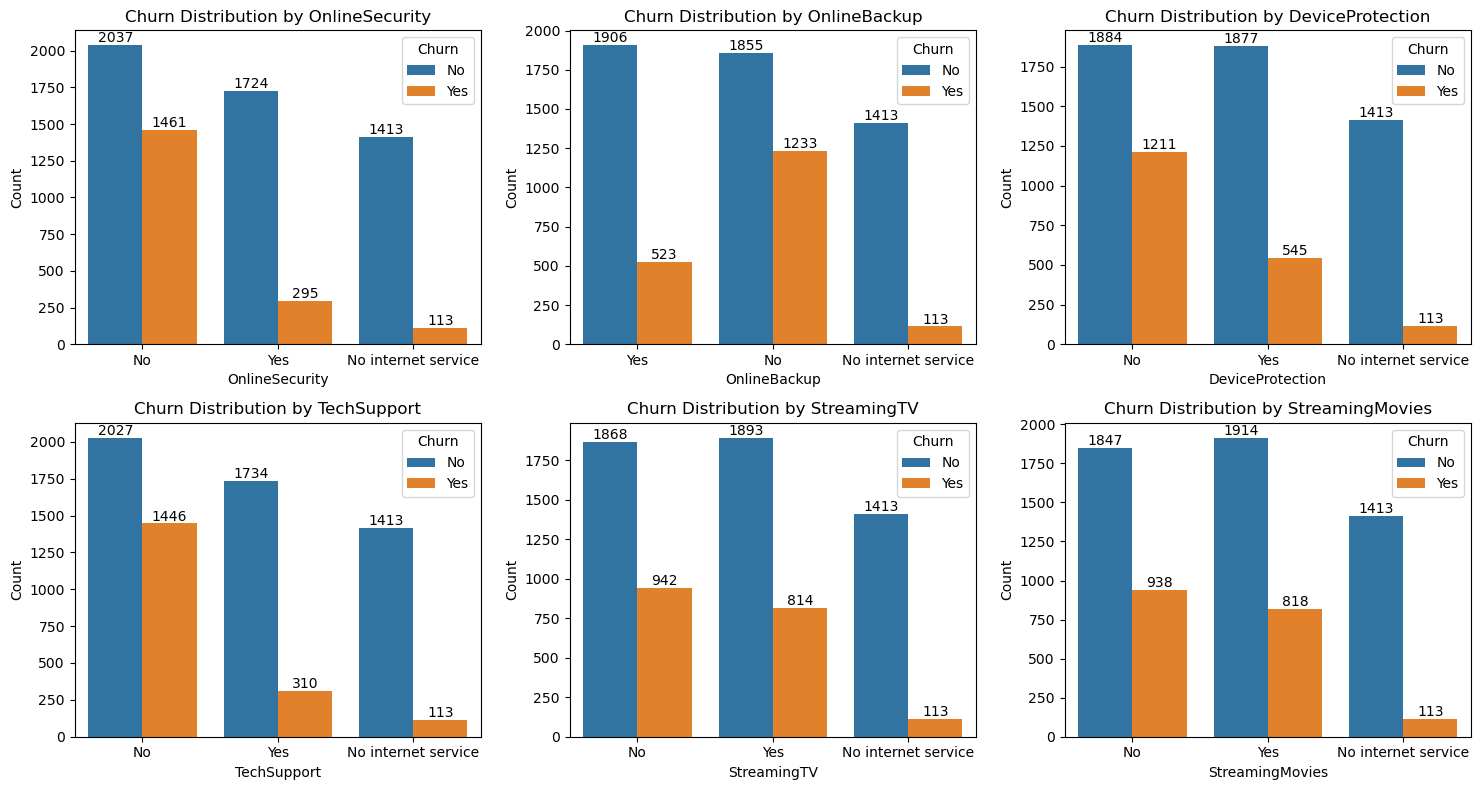

In [19]:
# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Plot for 'OnlineSecurity'
plot_countplot_with_labels(telco_base_data, 
                           'OnlineSecurity', 'Churn', 
                           'Churn Distribution by OnlineSecurity', 
                           'OnlineSecurity', 'Count', 'Churn', ax=axes[0, 0])

# Plot for 'OnlineBackup'
plot_countplot_with_labels(telco_base_data, 
                           'OnlineBackup', 'Churn', 
                           'Churn Distribution by OnlineBackup', 
                           'OnlineBackup', 'Count', 'Churn', ax=axes[0, 1])

# Plot for 'DeviceProtection'
plot_countplot_with_labels(telco_base_data, 
                           'DeviceProtection', 'Churn', 
                           'Churn Distribution by DeviceProtection', 
                           'DeviceProtection', 'Count', 'Churn', ax=axes[0, 2])

# Plot for 'TechSupport'
plot_countplot_with_labels(telco_base_data, 
                           'TechSupport', 'Churn', 
                           'Churn Distribution by TechSupport', 
                           'TechSupport', 'Count', 'Churn', ax=axes[1, 0])

# Plot for 'StreamingTV'
plot_countplot_with_labels(telco_base_data, 
                           'StreamingTV', 'Churn', 
                           'Churn Distribution by StreamingTV', 
                           'StreamingTV', 'Count', 'Churn', ax=axes[1, 1])

# Plot for 'StreamingMovies'
plot_countplot_with_labels(telco_base_data, 
                           'StreamingMovies', 'Churn', 
                           'Churn Distribution by StreamingMovies', 
                           'StreamingMovies', 'Count', 'Churn', ax=axes[1, 2])

plt.tight_layout()
plt.show()


In [20]:
import pandas as pd

# Assuming 'telco_base_data' is your original DataFrame
selected_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV','StreamingMovies']

# Create an empty DataFrame to store the results
result_df = pd.DataFrame()

# Iterate through selected columns and append value counts to the result DataFrame
for column in selected_columns:
    value_counts = telco_base_data[column].value_counts()
    result_df = pd.concat([result_df, value_counts.rename(column)], axis=1)

# Display the result
result_df


,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
No,3498,3088,3095,3473,2810,2785
Yes,2019,2429,2422,2044,2707,2732
No internet service,1526,1526,1526,1526,1526,1526


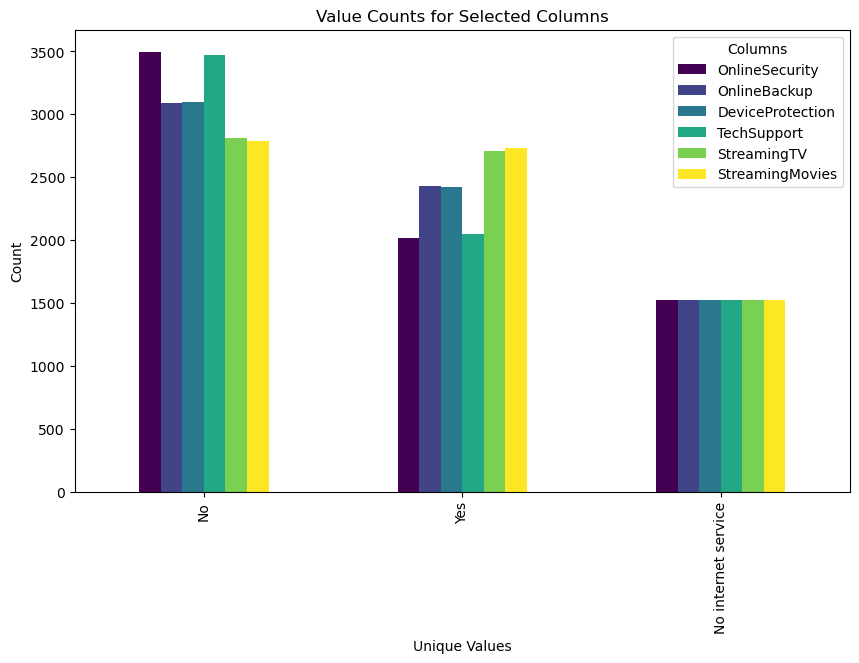

In [21]:
ax = result_df.plot(kind='bar', figsize=(10, 6), colormap='viridis')  # Use 'viridis' or another valid colormap
plt.title('Value Counts for Selected Columns')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.legend(title='Columns')  # Add legend with column names
plt.show()

In [22]:
# Define the bins for the desired ranges
bins = list(range(0, 85, 12))
labels = list(range(1, len(bins)))

# Use pd.cut to create the bins and then use value_counts to count occurrences
tenure_ranges = pd.cut(telco_base_data['tenure'], bins, right=False, labels=labels)
tenure_counts = tenure_ranges.value_counts().sort_index()

# Calculate churn counts for each category
churn_counts = pd.crosstab(tenure_ranges, telco_base_data['Churn'])

# Print the counts for each range and churn category
#print(churn_counts)
# Print the counts for each range
#print(tenure_counts)



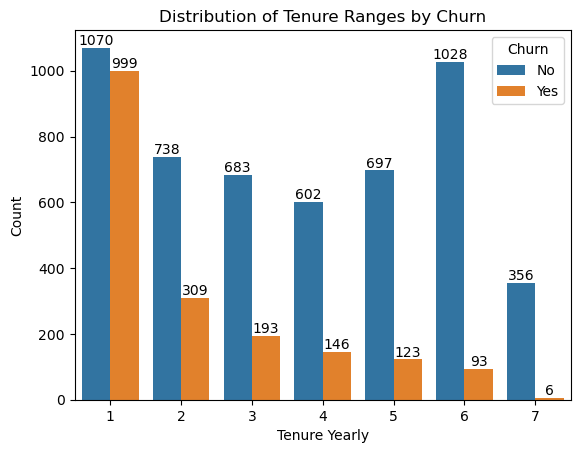

In [23]:
# Plot the countplot
ax = sns.countplot(x=tenure_ranges, hue=telco_base_data['Churn'])

# Set labels and title
plt.xlabel('Tenure Yearly')
plt.ylabel('Count')
plt.title('Distribution of Tenure Ranges by Churn')

# Show the legend
plt.legend(title='Churn', loc='upper right')

# Add data labels to each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()


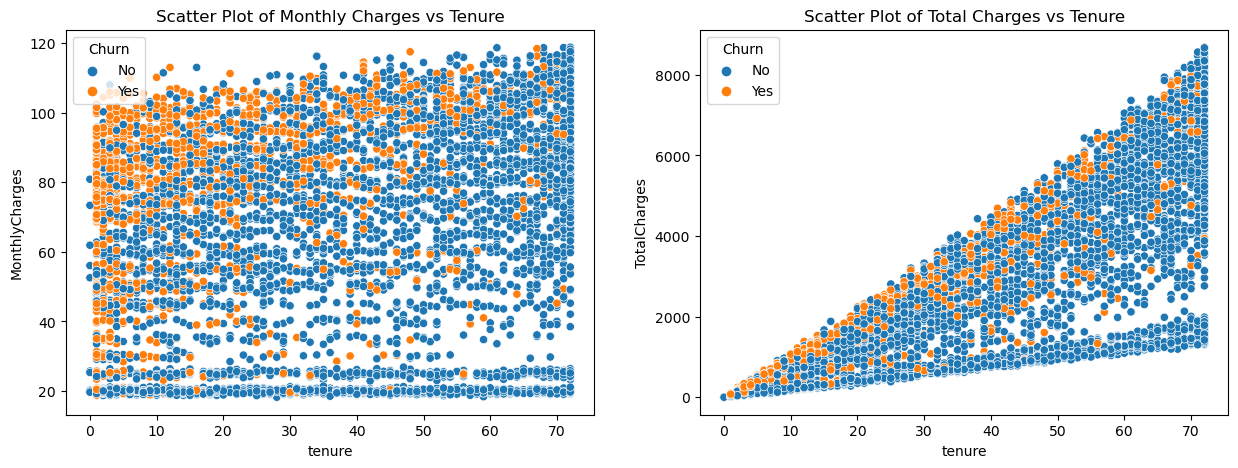

In [24]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot 1
sns.scatterplot(data=telco_base_data, y='MonthlyCharges', x='tenure', hue='Churn', alpha=1, ax=axes[0])
axes[0].set_title('Scatter Plot of Monthly Charges vs Tenure')

# Scatter plot 2
sns.scatterplot(data=telco_base_data, y='TotalCharges', x='tenure', hue='Churn', alpha=1, ax=axes[1])
axes[1].set_title('Scatter Plot of Total Charges vs Tenure')

# Show the plots
plt.show()

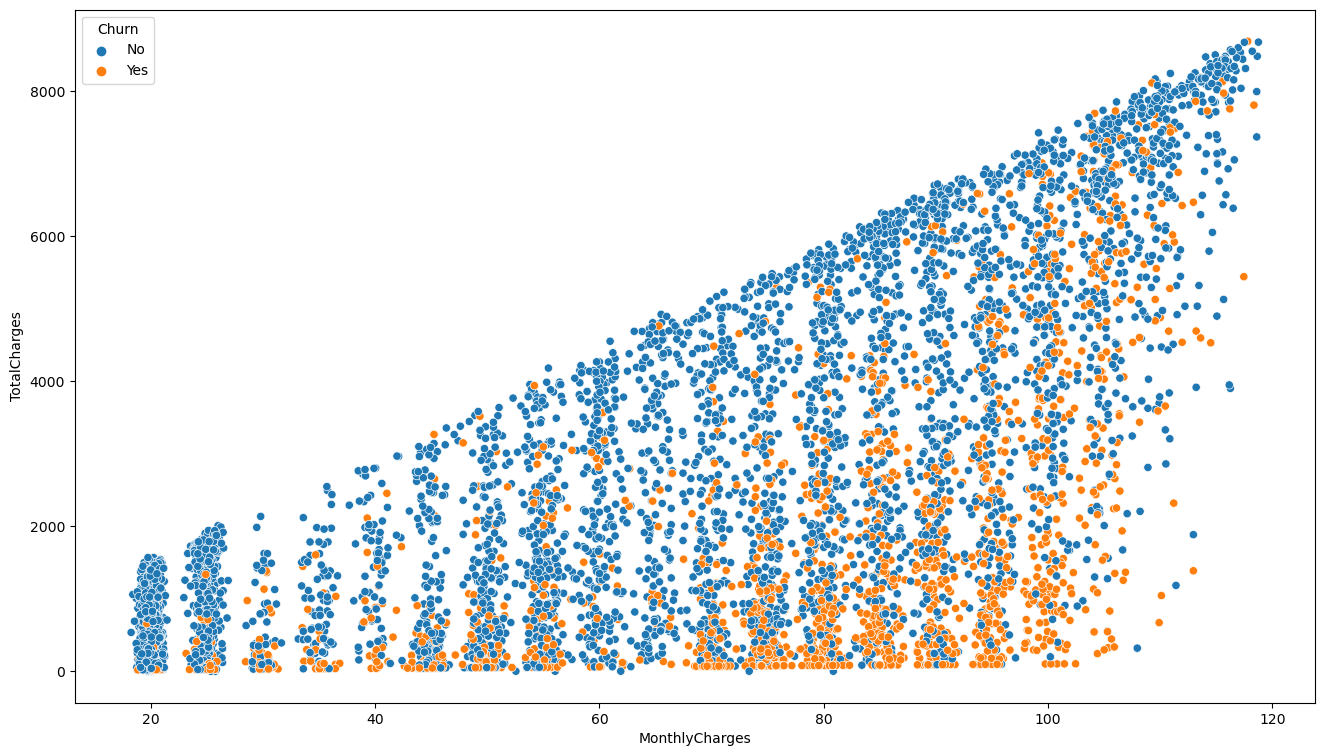

In [25]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=telco_base_data, x='MonthlyCharges', y='TotalCharges',hue='Churn', alpha=1)
plt.show()

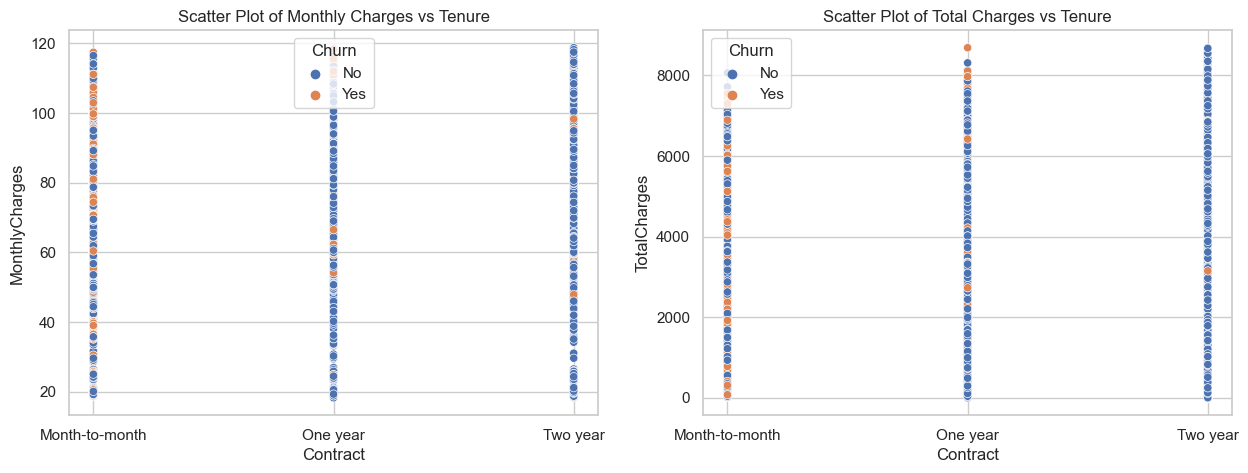

In [105]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot 1
sns.scatterplot(data=telco_base_data, y='MonthlyCharges', x='Contract', hue='Churn', alpha=1, ax=axes[0])
axes[0].set_title('Scatter Plot of Monthly Charges vs Tenure')

# Scatter plot 2
sns.scatterplot(data=telco_base_data, y='TotalCharges', x='Contract', hue='Churn', alpha=1, ax=axes[1])
axes[1].set_title('Scatter Plot of Total Charges vs Tenure')

# Show the plots
plt.show()

 Customers with a month-to-month contract tend to pay higher monthly charges than those with other contracts."

In [26]:
telco_base_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [27]:
telco_base_data.loc[telco_base_data["TotalCharges"].isnull(), 'TotalCharges'] = 0
telco_base_data.isnull().any().any()

False

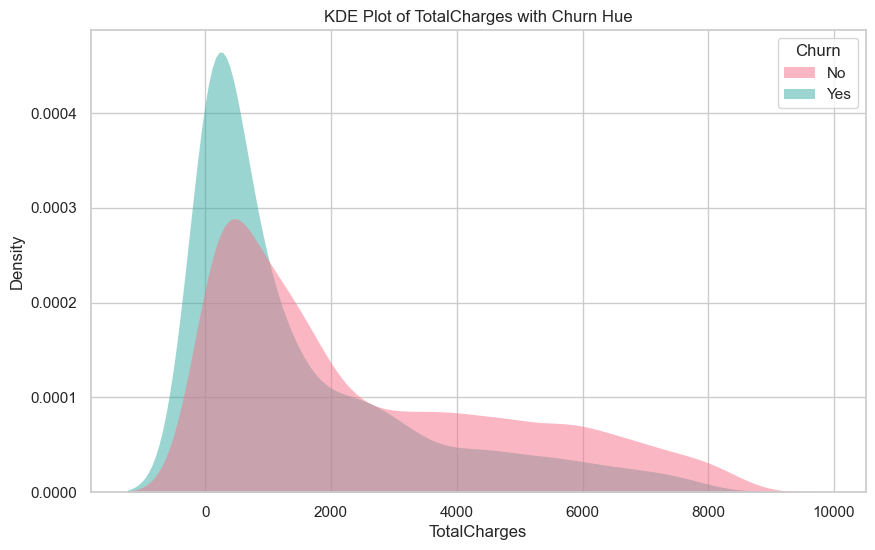

In [28]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.kdeplot(data=telco_base_data, x='TotalCharges', hue='Churn', fill=True, common_norm=False, palette='husl', alpha=.5, linewidth=0)
plt.title('KDE Plot of TotalCharges with Churn Hue')
plt.xlabel('TotalCharges')
plt.show()

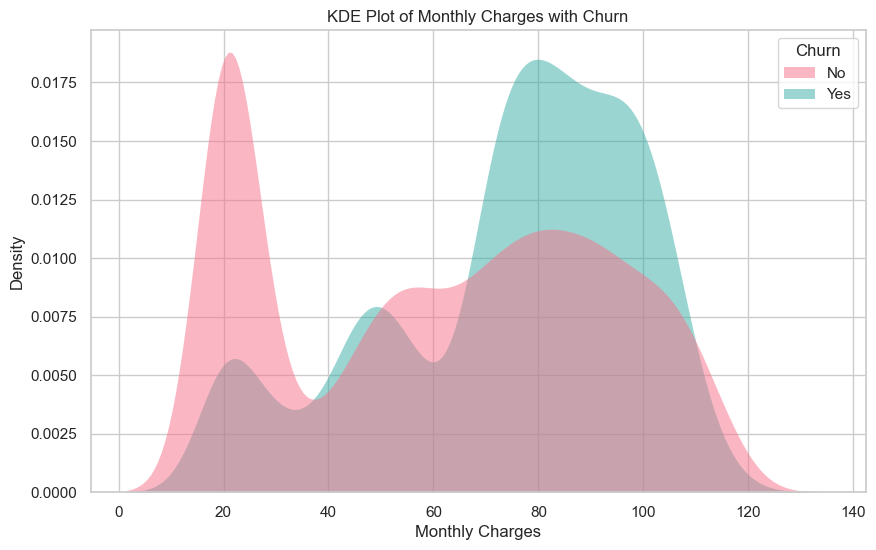

In [29]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.kdeplot(data=telco_base_data, x='MonthlyCharges', hue='Churn', fill=True, common_norm=False, palette='husl', alpha=.5, linewidth=0)
plt.title('KDE Plot of Monthly Charges with Churn')
plt.xlabel('Monthly Charges')
plt.show()

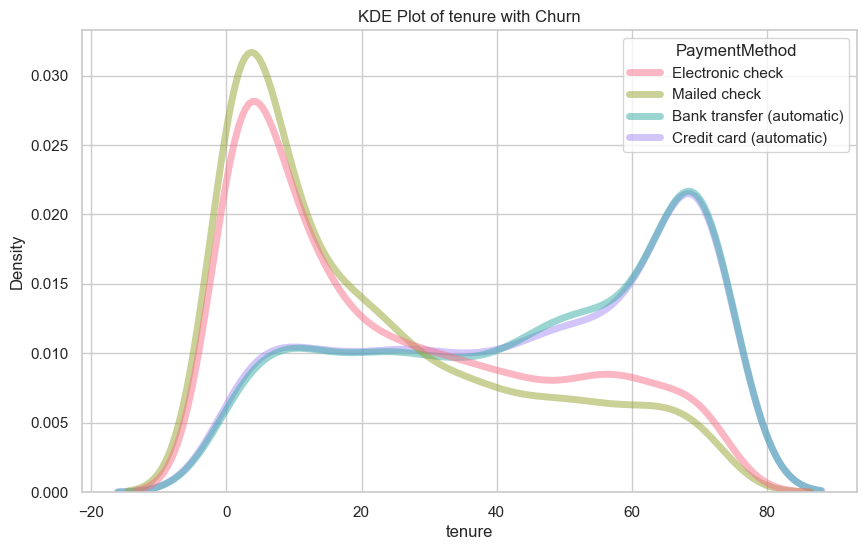

In [30]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.kdeplot(data=telco_base_data, x='tenure', hue='PaymentMethod', fill=False, common_norm=False, palette='husl', alpha=.5, linewidth=5)
plt.title('KDE Plot of tenure with Churn')
plt.xlabel('tenure')
plt.show()

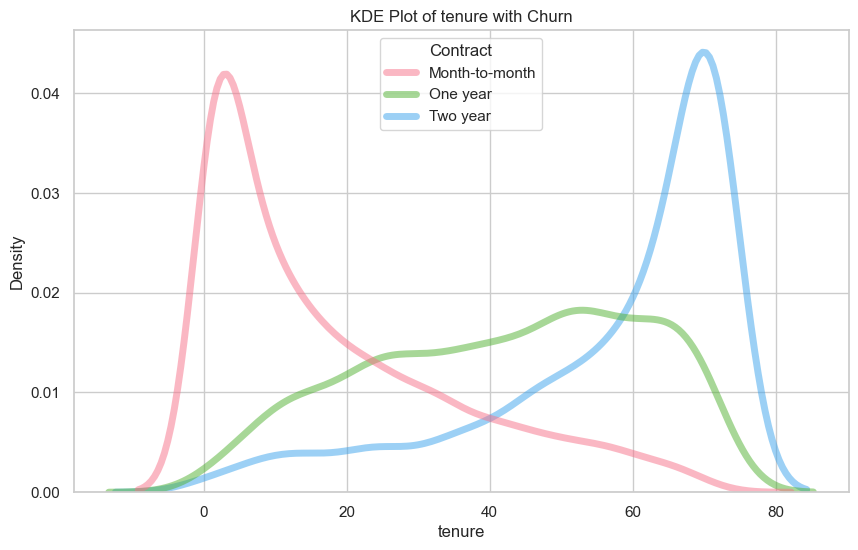

In [31]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.kdeplot(data=telco_base_data, x='tenure', hue='Contract', fill=False, common_norm=False, palette='husl', alpha=.5, linewidth=5)
plt.title('KDE Plot of tenure with Churn')
plt.xlabel('tenure')
plt.show()

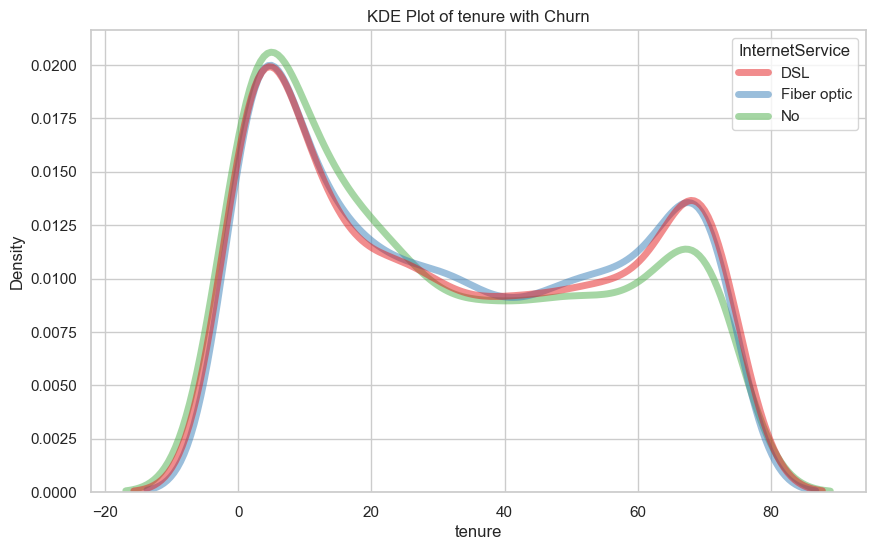

In [32]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.kdeplot(data=telco_base_data, x='tenure', hue='InternetService', fill=False, common_norm=False, palette='Set1', alpha=.5, linewidth=5)
plt.title('KDE Plot of tenure with Churn')
plt.xlabel('tenure')
plt.show()

                SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.016567        0.220173      0.103006
tenure               0.016567  1.000000        0.247900      0.826178
MonthlyCharges       0.220173  0.247900        1.000000      0.651174
TotalCharges         0.103006  0.826178        0.651174      1.000000


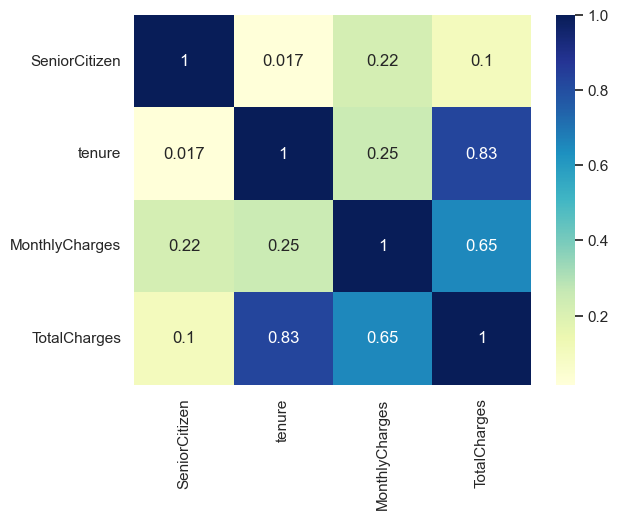

In [33]:
print(telco_base_data.corr()) 
  
# plotting correlation heatmap 
dataplot = sns.heatmap(telco_base_data.corr(), cmap="YlGnBu", annot=True) 
  
# displaying heatmap 
plt.show() 

# Data Preprocessing

In [34]:
data = pd.read_csv(r"C:\Users\Lavanya\Desktop\POWER BI PROJECTS\CUSTOMER CHURN\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [35]:
# Converting datatype of 'TotalCharges' 

data.TotalCharges = data.TotalCharges.replace(" ",np.nan)
data.TotalCharges.fillna(0, inplace = True)
data.TotalCharges = data.TotalCharges.astype(float)

In [36]:
data.drop(["customerID"], inplace = True, axis = 1)


In [37]:
cols1 = ['Partner', 'Dependents', 
         'Churn','PaperlessBilling', 
         'PhoneService']

for col in cols1:
    data[col] = data[col].map({'No': 0, 'Yes': 1})


In [38]:
data.gender = data.gender.apply(lambda x: 0 if x == "Male" else 1)

data.MultipleLines = data.MultipleLines.map({'No phone service': 0, 'No': 0, 'Yes': 1})

cols2 = ['OnlineSecurity', 'OnlineBackup', 
         'DeviceProtection', 'TechSupport', 
         'StreamingTV', 'StreamingMovies']

mapping_dict = {'No internet service': 0, 'No': 0, 'Yes': 1}

for col in cols2:
    data[col] = data[col].map(mapping_dict)


In [39]:
data = pd.get_dummies(data, columns=['InternetService', 
                                     'Contract', 'PaymentMethod'], 
                      drop_first=True)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   int64  
 7   OnlineSecurity                         7043 non-null   int64  
 8   OnlineBackup                           7043 non-null   int64  
 9   DeviceProtection                       7043 non-null   int64  
 10  TechSupport                            7043 non-null   int64  
 11  Stre

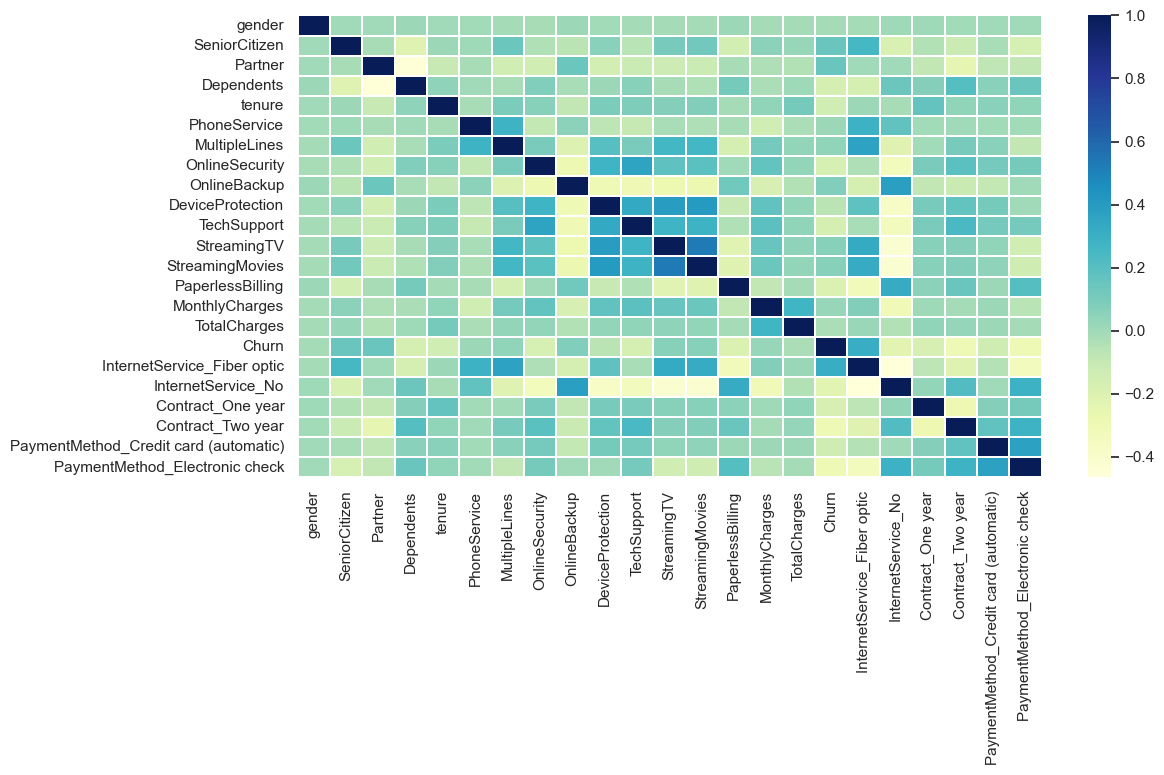

In [41]:
# Plot correlation heatmap
plt.figure(figsize=(12, 6))
corr = data.iloc[:, :-1].apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=0.2, cmap="YlGnBu")
plt.show()

# Modeling Method


In [42]:
y = data['Churn']
X = data.drop('Churn', axis=1)
# split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,
                                                   stratify=y, random_state=42)

In [43]:
# Function to display confusion matrix and classification report
def display_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Classification Report
    report = classification_report(y_test, y_pred)
    print("\nClassification Report:")
    print(report)
    

In [44]:
def display_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Display as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
   

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

# Function to display ROC curve and AUC with baseline
def display_roc_auc(model, X_test, y_test, model_name='Classifier'):
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability of the positive class

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    # Create RocCurveDisplay from predictions
    roc_display = RocCurveDisplay.from_predictions(y_test, y_prob, name=model_name)
    #roc_display.plot()

    # Plot the baseline (random classifier)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Baseline (Random)')

    # Display model name and AUC score
    auc = roc_auc_score(y_test, y_prob)
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()


# Logistic Regression

In [46]:
# Logistic Regression
def train_logistic_regression(X_train, y_train):
    model = LogisticRegression(random_state=42, max_iter=500)
    model.fit(X_train, y_train)
    return model

logistic_model = train_logistic_regression(X_train, y_train)
y_pred = logistic_model.predict(X_test)

In [47]:
# Display metrics for Logistic Regression
print("\nMetrics for Logistic Regression:")
display_metrics(logistic_model, X_test, y_test)


Metrics for Logistic Regression:
Confusion Matrix:
[[1165  129]
 [ 211  256]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1294
           1       0.66      0.55      0.60       467

    accuracy                           0.81      1761
   macro avg       0.76      0.72      0.74      1761
weighted avg       0.80      0.81      0.80      1761



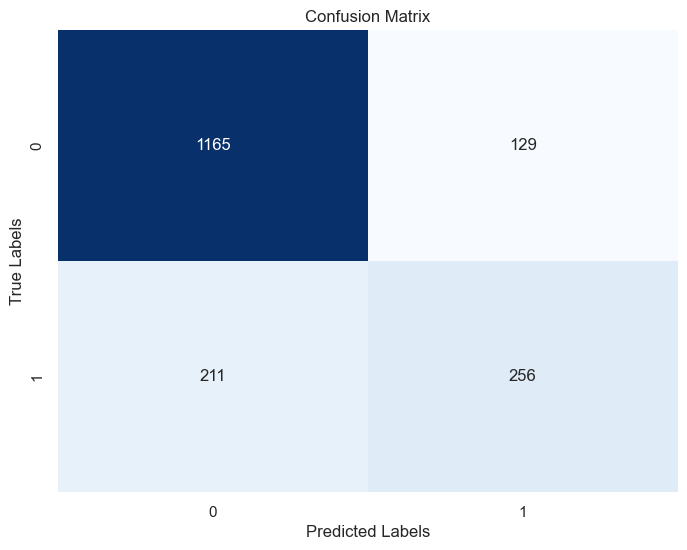

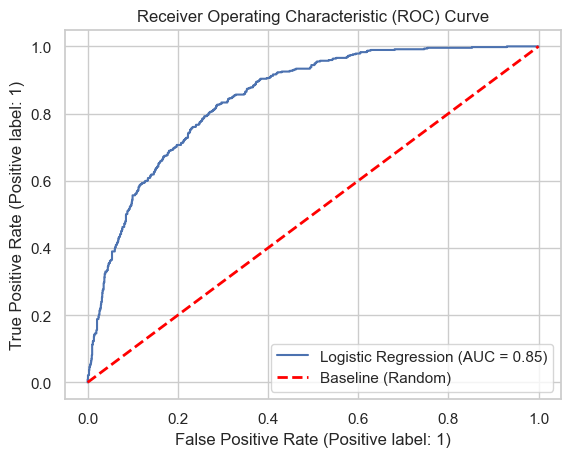

In [48]:
# Display confusion matrix for Logistic Regression
display_confusion_matrix(logistic_model, X_test, y_test)

# Display ROC curve and AUC for Logistic Regression
display_roc_auc(logistic_model, X_test, y_test, model_name='Logistic Regression')


# Naive Bayes

In [49]:
# Naive Bayes
def train_naive_bayes(X_train, y_train):
    model = GaussianNB()
    model.fit(X_train, y_train)
    return model

naive_bayes_model = train_naive_bayes(X_train, y_train)
y_pred = naive_bayes_model.predict(X_test)

In [50]:
# Display metrics for Naive Bayes
print("\nMetrics for Naive Bayes:")
display_metrics(naive_bayes_model, X_test, y_test)


Metrics for Naive Bayes:
Confusion Matrix:
[[965 329]
 [111 356]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.81      1294
           1       0.52      0.76      0.62       467

    accuracy                           0.75      1761
   macro avg       0.71      0.75      0.72      1761
weighted avg       0.80      0.75      0.76      1761



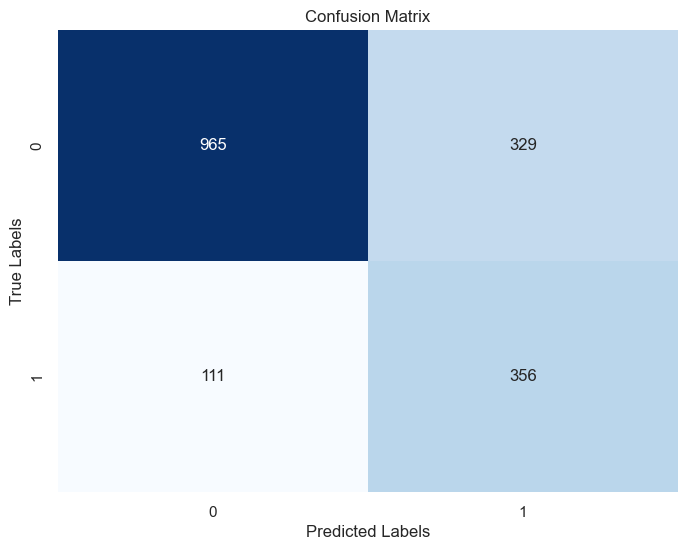

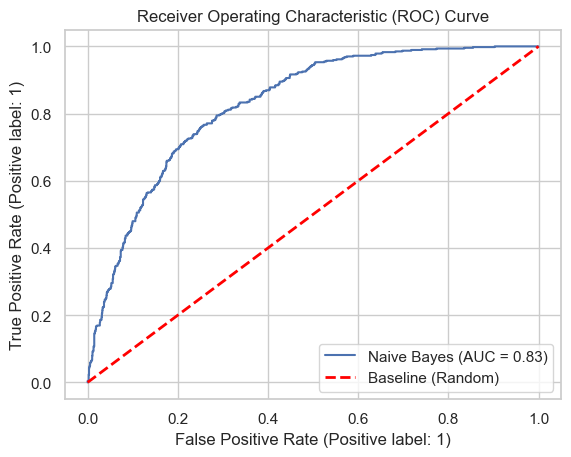

In [51]:
# Display confusion matrix for Naive Bayes
display_confusion_matrix(naive_bayes_model, X_test, y_test)

# Display ROC curve and AUC for Naive Bayes
display_roc_auc(naive_bayes_model, X_test, y_test, model_name='Naive Bayes')

# Decision Tree

In [52]:
# Decision Tree
def train_decision_tree(X_train, y_train):
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    return model

decision_tree_model = train_decision_tree(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)

In [53]:
# Display metrics for Decision Tree
print("\nMetrics for Decision Tree:")
display_metrics(decision_tree_model, X_test, y_test)


Metrics for Decision Tree:
Confusion Matrix:
[[1052  242]
 [ 228  239]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1294
           1       0.50      0.51      0.50       467

    accuracy                           0.73      1761
   macro avg       0.66      0.66      0.66      1761
weighted avg       0.74      0.73      0.73      1761



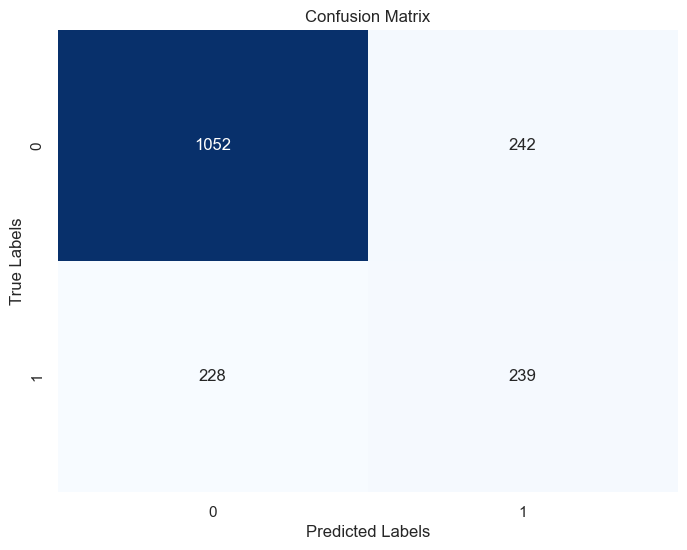

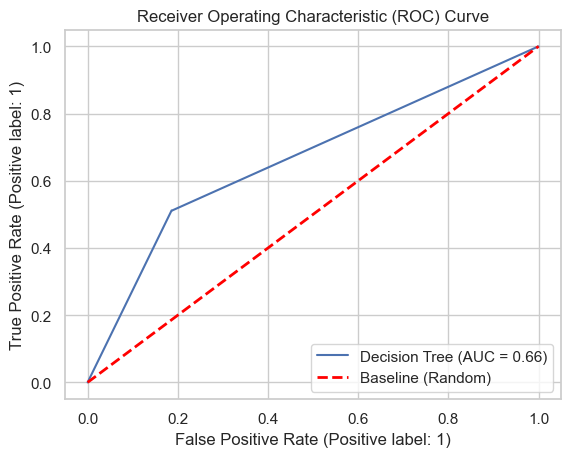

In [54]:
# Display confusion matrix for Decision Tree
display_confusion_matrix(decision_tree_model, X_test, y_test)

# Display ROC curve and AUC for Decision Tree
display_roc_auc(decision_tree_model, X_test, y_test, model_name='Decision Tree')


# Random Forest

In [55]:
# Random Forest
def train_random_forest(X_train, y_train):
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    return model

random_forest_model = train_random_forest(X_train, y_train)
y_pred = random_forest_model.predict(X_test)

In [56]:
# Display metrics for Random Forest
print("\nMetrics for Random Forest:")
display_metrics(random_forest_model, X_test, y_test)


Metrics for Random Forest:
Confusion Matrix:
[[1169  125]
 [ 243  224]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1294
           1       0.64      0.48      0.55       467

    accuracy                           0.79      1761
   macro avg       0.73      0.69      0.71      1761
weighted avg       0.78      0.79      0.78      1761



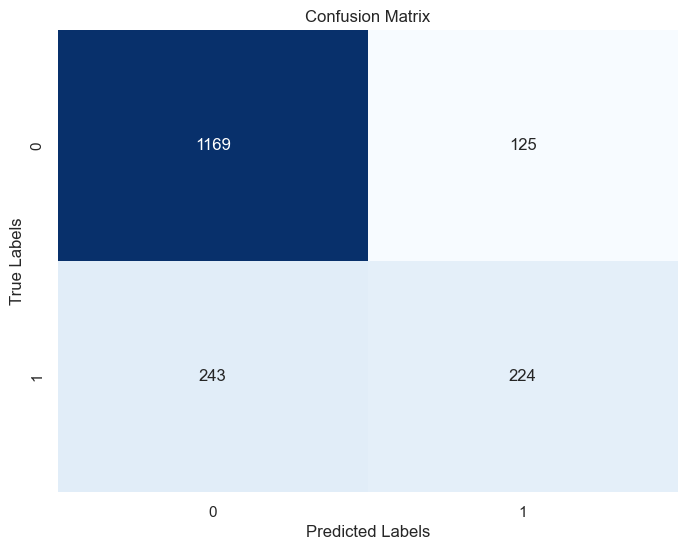

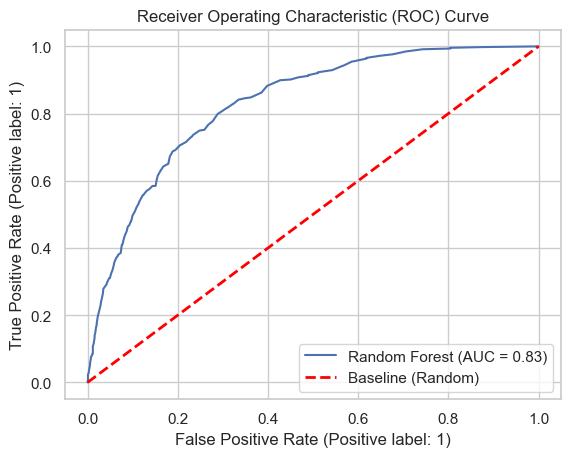

In [57]:
# Display confusion matrix for Random Forest
display_confusion_matrix(random_forest_model, X_test, y_test)

# Display ROC curve and AUC for Random Forest
display_roc_auc(random_forest_model, X_test, y_test, model_name='Random Forest')

# XGBoost

In [58]:
# XGBoost
def train_xgboost(X_train, y_train):
    model = XGBClassifier()
    model.fit(X_train, y_train)
    return model

xgboost_model = train_xgboost(X_train, y_train)
y_pred = xgboost_model.predict(X_test)


In [59]:
# Display metrics for XGBoost
print("\nMetrics for XGBoost:")
display_metrics(xgboost_model, X_test, y_test)


Metrics for XGBoost:
Confusion Matrix:
[[1144  150]
 [ 236  231]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1294
           1       0.61      0.49      0.54       467

    accuracy                           0.78      1761
   macro avg       0.72      0.69      0.70      1761
weighted avg       0.77      0.78      0.77      1761



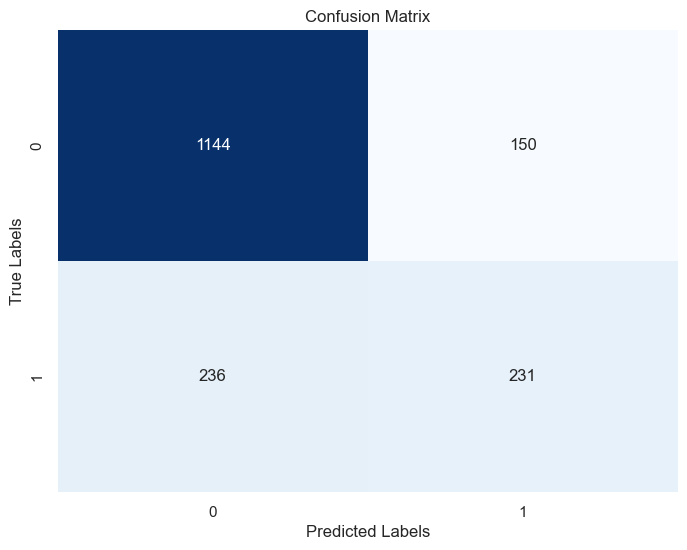

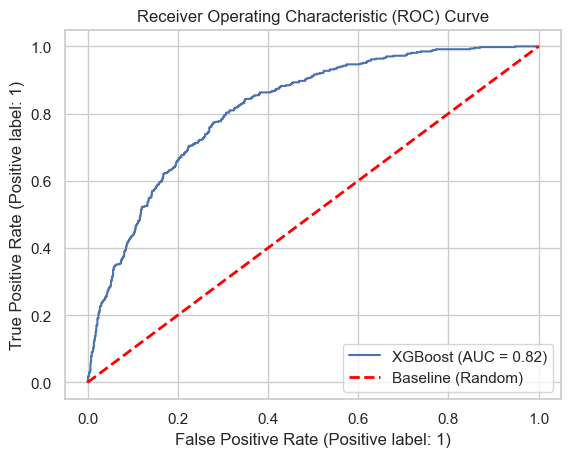

In [60]:
# Display confusion matrix for XGBoost
display_confusion_matrix(xgboost_model, X_test, y_test)

# Display ROC curve and AUC for XGBoost
display_roc_auc(xgboost_model, X_test, y_test, model_name='XGBoost')

# Comparing train and test score

In [61]:
# Function to calculate metrics for a model on both training and testing sets
def calculate_metrics_train_test(model, X_train, y_train, X_test, y_test):
    # Training set
    y_train_pred = model.predict(X_train)
    y_train_prob = model.predict_proba(X_train)[:, 1]

    # Testing set
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    auc_train = roc_auc_score(y_train, y_train_prob)

    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    auc_test = roc_auc_score(y_test, y_test_prob)

    return {
        'Accuracy Train': accuracy_train,
        'Precision Train': precision_train,
        'Recall Train': recall_train,
        'F1 Score Train': f1_train,
        'AUC Score Train': auc_train,
        'Accuracy Test': accuracy_test,
        'Precision Test': precision_test,
        'Recall Test': recall_test,
        'F1 Score Test': f1_test,
        'AUC Score Test': auc_test,
    }

In [62]:
models = ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost']

# Create DataFrames for each metric for both training and testing sets
accuracy_df = pd.DataFrame(index=models, columns=['Accuracy Train', 'Accuracy Test'])
precision_df = pd.DataFrame(index=models, columns=['Precision Train', 'Precision Test'])
recall_df = pd.DataFrame(index=models, columns=['Recall Train', 'Recall Test'])
f1_score_df = pd.DataFrame(index=models, columns=['F1 Score Train', 'F1 Score Test'])
auc_score_df = pd.DataFrame(index=models, columns=['AUC Score Train', 'AUC Score Test'])

# Calculate and store scores for each metric for each model on both training and testing sets
for model_name, model in zip(models, [logistic_model, naive_bayes_model, decision_tree_model, random_forest_model, xgboost_model]):
    metrics_train_test = calculate_metrics_train_test(model, X_train, y_train, X_test, y_test)
    
    accuracy_df.loc[model_name] = [metrics_train_test['Accuracy Train'], metrics_train_test['Accuracy Test']]
    precision_df.loc[model_name] = [metrics_train_test['Precision Train'], metrics_train_test['Precision Test']]
    recall_df.loc[model_name] = [metrics_train_test['Recall Train'], metrics_train_test['Recall Test']]
    f1_score_df.loc[model_name] = [metrics_train_test['F1 Score Train'], metrics_train_test['F1 Score Test']]
    auc_score_df.loc[model_name] = [metrics_train_test['AUC Score Train'], metrics_train_test['AUC Score Test']]



In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot a bar chart for a metric DataFrame with percentage labels
def plot_metric_bar_chart(metric_df, metric_name):
    models = metric_df.index
    bar_width = 0.35
    index = np.arange(len(models))

    plt.figure(figsize=(10, 4))
    
    # Plotting bars
    bars_train = plt.bar(index, metric_df[f'{metric_name} Train'], bar_width, label='Training', color='blue')
    bars_test = plt.bar(index + bar_width, metric_df[f'{metric_name} Test'], bar_width, label='Testing', color='orange')

    plt.xlabel('Models')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} for Each Model (Training and Testing)')
    plt.xticks(index + bar_width / 2, models)
    plt.legend()

    # Adding percentage labels inside the bars
    for bar_train, bar_test in zip(bars_train, bars_test):
        height_train = bar_train.get_height()
        height_test = bar_test.get_height()
        
        plt.text(bar_train.get_x() + bar_train.get_width() / 2, height_train + 0.01, f'{height_train:.1%}', ha='center', color='black')
        plt.text(bar_test.get_x() + bar_test.get_width() / 2, height_test + 0.01, f'{height_test:.1%}', ha='center', color='black')

    plt.show()

In [64]:
print("Accuracy Scores:")
accuracy_df


Accuracy Scores:


,Accuracy Train,Accuracy Test
Logistic Regression,0.805755,0.806928
Naive Bayes,0.751988,0.750142
Decision Tree,0.997917,0.733106
Random Forest,0.997917,0.791028
XGBoost,0.940174,0.780806


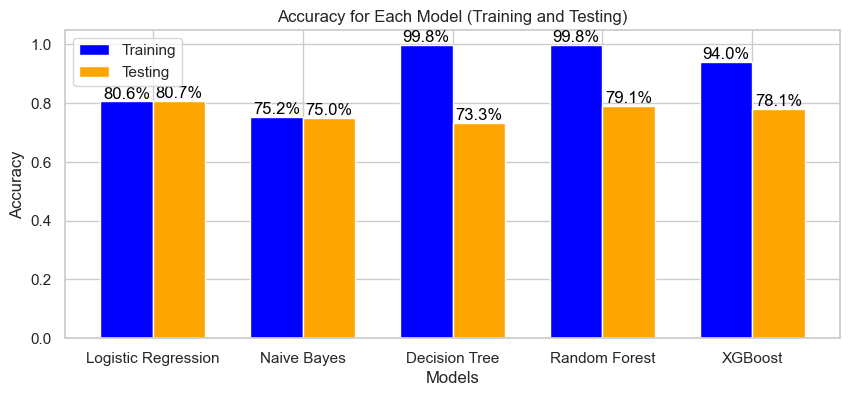

In [65]:
plot_metric_bar_chart(accuracy_df, 'Accuracy')

In [66]:
print("\nPrecision Scores:")
precision_df


Precision Scores:


,Precision Train,Precision Test
Logistic Regression,0.66263,0.664935
Naive Bayes,0.522179,0.519708
Decision Tree,0.999282,0.496881
Random Forest,0.996431,0.641834
XGBoost,0.913872,0.606299


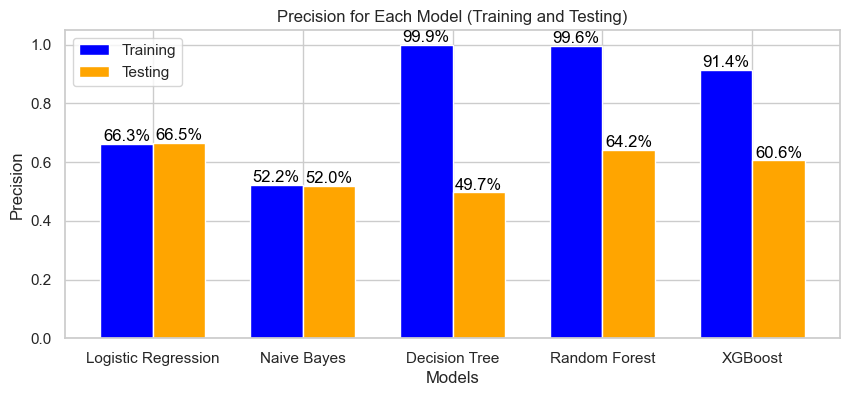

In [67]:
plot_metric_bar_chart(precision_df, 'Precision')


In [68]:
print("\nRecall Scores:")
recall_df


Recall Scores:


,Recall Train,Recall Test
Logistic Regression,0.546362,0.54818
Naive Bayes,0.772468,0.762313
Decision Tree,0.992867,0.511777
Random Forest,0.99572,0.479657
XGBoost,0.855207,0.494647


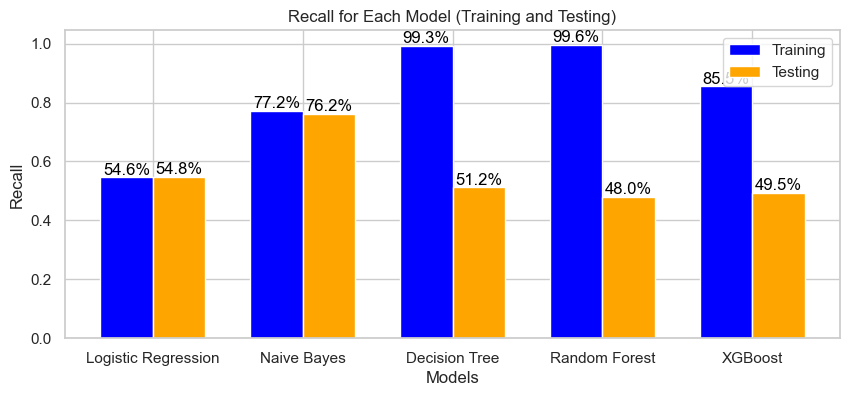

In [69]:
plot_metric_bar_chart(recall_df, 'Recall')

In [70]:
print("\nF1 Score Scores:")
f1_score_df


F1 Score Scores:


,F1 Score Train,F1 Score Test
Logistic Regression,0.598905,0.600939
Naive Bayes,0.62313,0.618056
Decision Tree,0.996064,0.504219
Random Forest,0.996076,0.54902
XGBoost,0.883567,0.544811


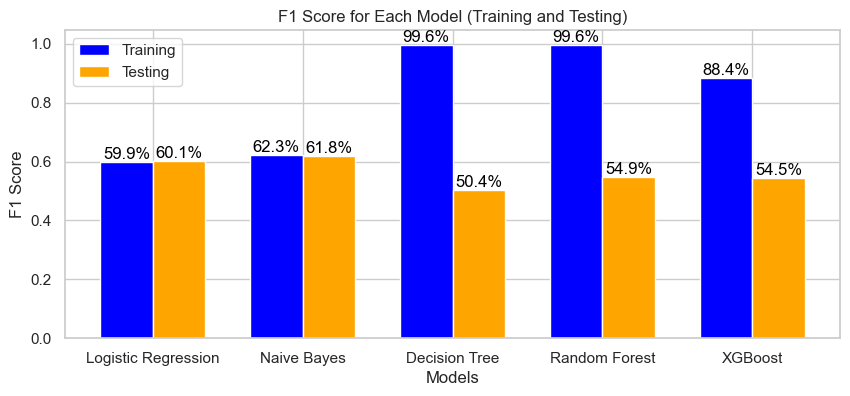

In [71]:
plot_metric_bar_chart(f1_score_df, 'F1 Score')

In [72]:
print("\nAUC Score Scores:")
auc_score_df


AUC Score Scores:


,AUC Score Train,AUC Score Test
Logistic Regression,0.847807,0.847016
Naive Bayes,0.832112,0.82859
Decision Tree,0.999988,0.662389
Random Forest,0.999927,0.829446
XGBoost,0.98468,0.816251


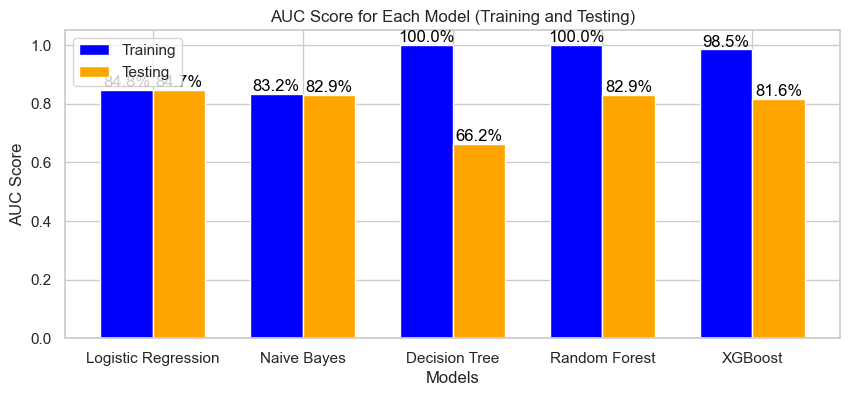

In [73]:
plot_metric_bar_chart(auc_score_df, 'AUC Score')

Logistic Regression exhibits consistent performance across accuracy, precision, recall, F1 score, and AUC score, indicating a good balance between true positives and negatives. Naive Bayes shows lower precision but higher recall, suggesting its strength in identifying positive instances.

Decision Tree and Random Forest demonstrate high accuracy on the training set, but Decision Tree's performance drops on the testing set, indicating potential overfitting. Random Forest maintains a robust performance with good precision and recall. XGBoost displays competitive results across various metrics, striking a balance between precision and recall.

In summary, Logistic Regression appears as a reliable model with balanced performance, while Random Forest and XGBoost demonstrate strong overall performance. Decision Tree, however, raises concerns about overfitting on the training data. These results emphasize the importance of evaluating models across multiple metrics to gain a comprehensive understanding of their effectiveness.

# Cross-validated hyperparameter tuning

# Decision Tree CV

In [74]:
# Cross-validated hyperparameter tuning 
tree_para = {
    'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50],
    'min_samples_leaf': [2, 5, 10, 20, 50]
}

scoring = {'accuracy','precision','recall','f1'}

tuned_decision_tree = DecisionTreeClassifier(random_state=42)

# GridSearch
clf = GridSearchCV(tuned_decision_tree,
                  tree_para,
                  scoring = scoring,
                  cv=5,
                  refit="f1")

In [75]:
#fit the model
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50],
                         'min_samples_leaf': [2, 5, 10, 20, 50]},
             refit='f1', scoring={'f1', 'accuracy', 'recall', 'precision'})

In [76]:
# best model from GridSearch
clf.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=2, random_state=42)

In [77]:
print("Best Avg. Validation score: ", "%.4f" % clf.best_score_)

Best Avg. Validation score:  0.5498


In [78]:
def results(model_name, model_object):
    
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]
    
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    
    table = pd.DataFrame()
    table = pd.concat([pd.DataFrame({'Model': model_name,
                                     'F1': f1,
                                     'Recall': recall,
                                     'Precision': precision,
                                     'Accuracy': accuracy},
                                    index=[0])],
                      ignore_index=True
                     )
    return table

In [79]:
dt_cv = results("Decision Tree CV", clf)
dt_cv

,Model,F1,Recall,Precision,Accuracy
0,Decision Tree CV,0.549832,0.504344,0.612865,0.782277


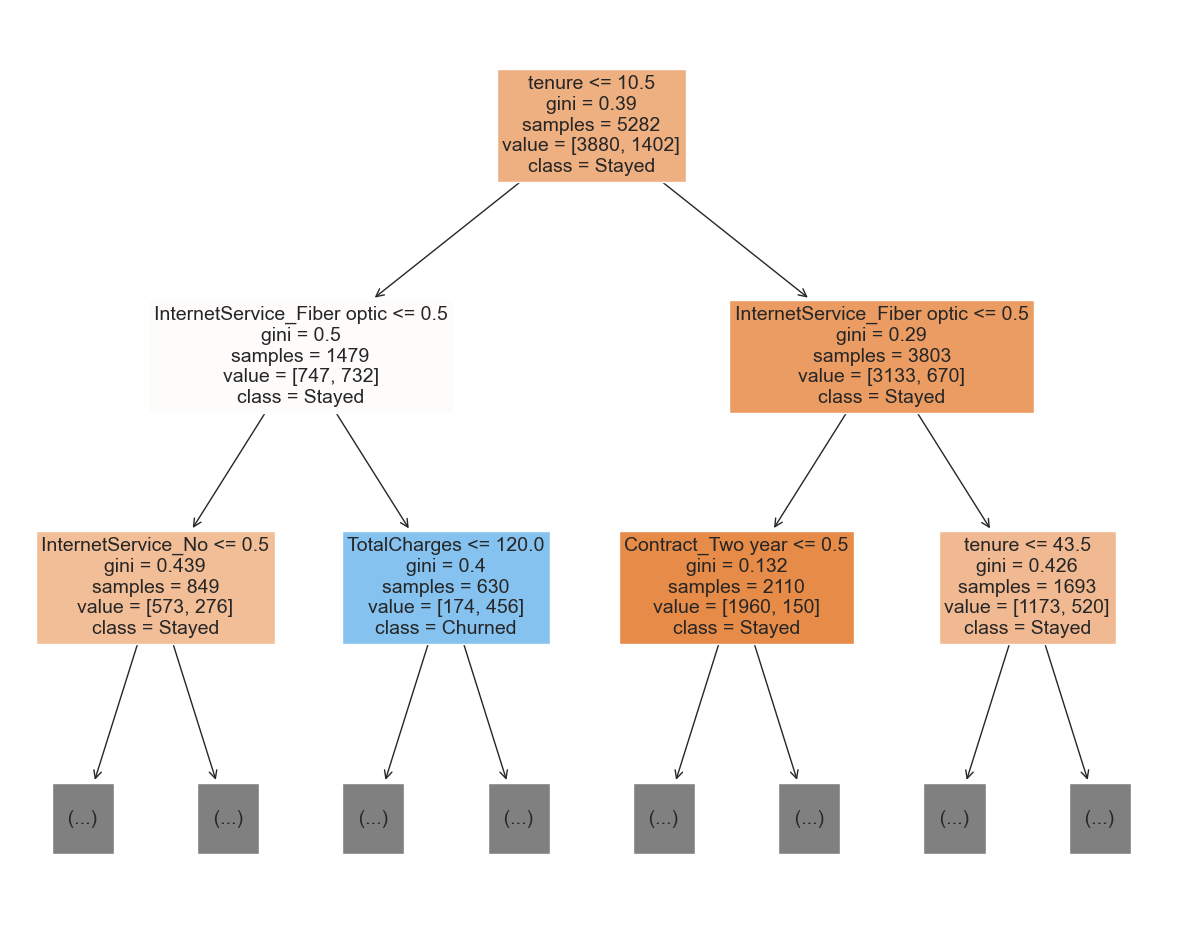

In [80]:
#plot the tree
plt.figure(figsize=(15,12))
plot_tree(clf.best_estimator_, max_depth=2, fontsize=14,feature_names=X.columns,
          class_names={0:'Stayed', 1:'Churned'},filled=True)
plt.show()

In [81]:
clf_importances = pd.DataFrame(clf.best_estimator_.feature_importances_,
                              columns=['gini_importance'],
                              index=X.columns
                              )

clf_importances =clf_importances.sort_values(by='gini_importance', ascending=False)

#extracting the feature with importnance > 0 
clf_importances = clf_importances[clf_importances['gini_importance'] != 0]
clf_importances

,gini_importance
tenure,0.349070
InternetService_Fiber optic,0.273024
TotalCharges,0.098672
MonthlyCharges,0.066920
InternetService_No,0.030767
PaymentMethod_Electronic check,0.030281
Contract_Two year,0.027238
Contract_One year,0.024168
PaperlessBilling,0.015748
StreamingMovies,0.013766


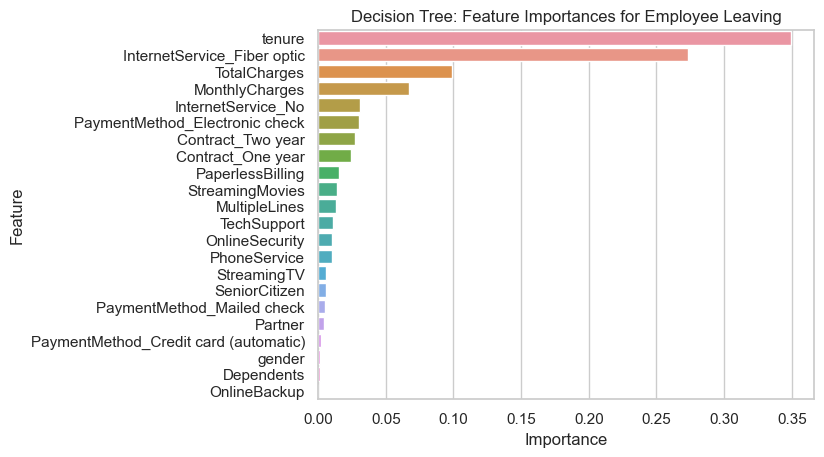

In [82]:
sns.barplot(data=clf_importances, x='gini_importance',
           y=clf_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

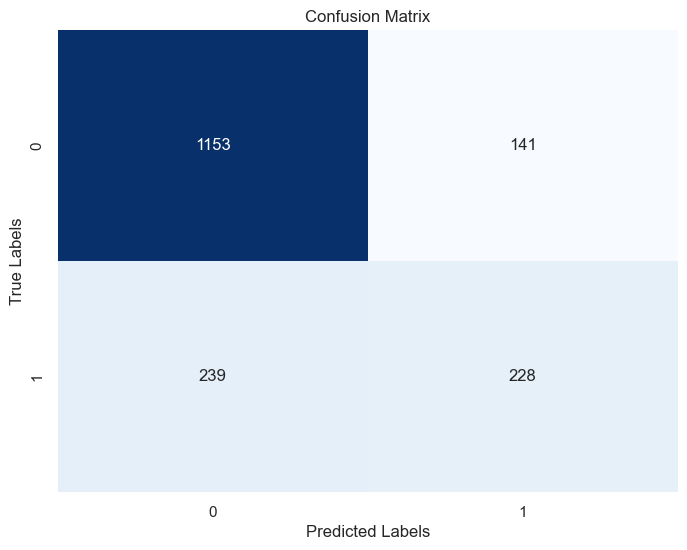

In [83]:
# Display confusion matrix for Cross validation Decision Tree
display_confusion_matrix(clf, X_test, y_test)

# Random Forest CV

In [84]:
#Cross-validated hyperparameter tuning for random forest 
rf = RandomForestClassifier(random_state=0)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use a list or tuple for scoring instead of a set
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Specify refit='f1' to refit the model with the best parameters based on F1 score
rf_cv = GridSearchCV(rf, param_grid, scoring=scoring, cv=5, refit='f1')

In [85]:
rf_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [86]:
rf_cv.best_params_

{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [87]:
print("Best Avg. Validation score of Random Forest : ", "%.4f" % rf_cv.best_score_)

Best Avg. Validation score of Random Forest :  0.5788


In [88]:
rf_results = results('Random Forest CV', rf_cv)
rf_results

,Model,F1,Recall,Precision,Accuracy
0,Random Forest CV,0.57883,0.506416,0.677756,0.804804


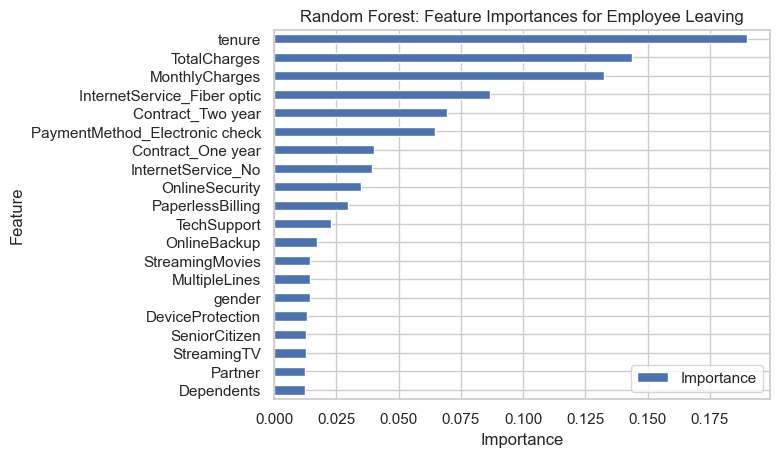

In [89]:
# Feature Importance

feat_impt = rf_cv.best_estimator_.feature_importances_
ind = np.argpartition(rf_cv.best_estimator_.feature_importances_, -20)[-20:]

feat = X.columns[ind]

feat_impt = feat_impt[ind]

y = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort = y.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort.plot(kind='barh', ax=ax1, x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

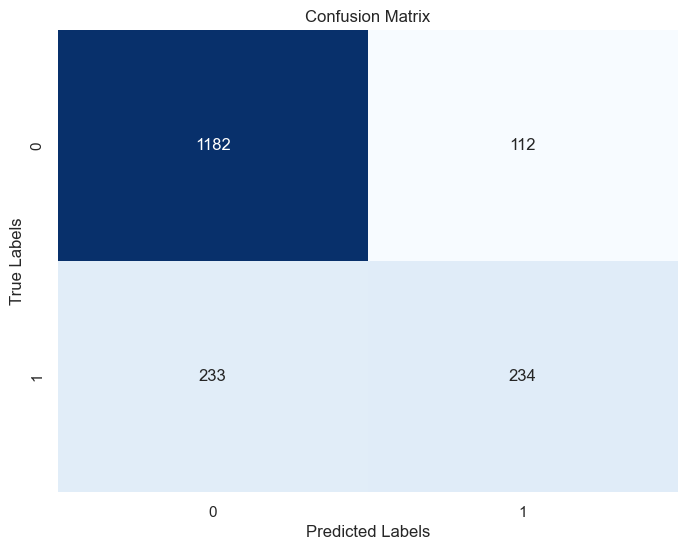

In [90]:
# Display confusion matrix for XGBoost
display_confusion_matrix(rf_cv, X_test, y_test)

# XGBOOST Cross validation


In [91]:
#Cross-validated hyperparameter tuning
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Parameter grid for hyperparameter tuning
cv_params = {
    'max_depth': [4, 5, 6, 7, 8],
    'min_child_weight': [1, 2, 3, 4, 5],
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [75, 100, 125]
}

# Scoring metrics for hyperparameter optimization
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# GridSearchCV setup
xgb_cv = GridSearchCV(xgb,cv_params,scoring=scoring,cv=5,refit='f1')

In [92]:
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

In [93]:
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 75}

In [94]:
xgb_results = results('XGBoost CV', xgb_cv)
xgb_results

,Model,F1,Recall,Precision,Accuracy
0,XGBoost CV,0.587712,0.526406,0.667279,0.804238


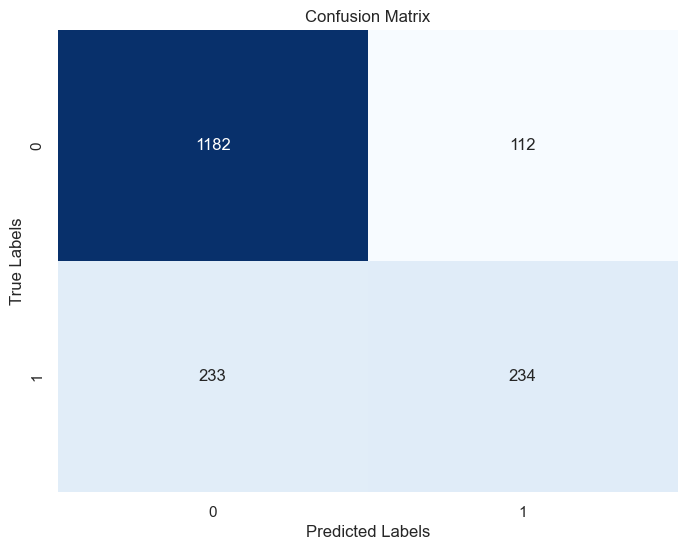

In [95]:
# Display confusion matrix for XGBoost
display_confusion_matrix(rf_cv, X_test, y_test)

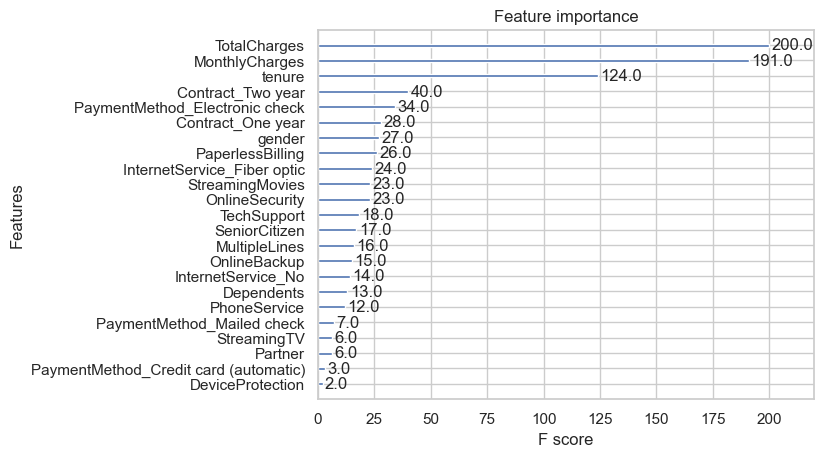

In [96]:
plot_importance(xgb_cv.best_estimator_);

In [97]:
# Create a list of DataFrames to display metrics
result_dfs = [dt_cv,rf_results, xgb_results]
combined_df = pd.concat(result_dfs, ignore_index=True)
combined_df

,Model,F1,Recall,Precision,Accuracy
0,Decision Tree CV,0.549832,0.504344,0.612865,0.782277
1,Random Forest CV,0.578830,0.506416,0.677756,0.804804
2,XGBoost CV,0.587712,0.526406,0.667279,0.804238


In [98]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

def evaluate_model(model, X_test, y_test, model_name):
    # Make predictions on the test set
    preds = model.predict(X_test)

    # Evaluate the model using different metrics
    f1 = f1_score(y_test, preds)
    recall = recall_score(y_test, preds)
    precision = precision_score(y_test, preds)
    accuracy = accuracy_score(y_test, preds)

    # Create a DataFrame with the evaluation metrics
    table = pd.DataFrame({
        'Model': model_name,
        'F1_test': f1,
        'Recall_test': recall,
        'Precision_test': precision,
        'Accuracy_test': accuracy
    }, index=[0])

    return table


In [99]:
cv_dt = evaluate_model(clf, X_test, y_test,"Decision Tree CV")
cv_rf = evaluate_model(rf_cv, X_test, y_test, "Random Forest CV")
xgb_cv = evaluate_model(xgb_cv, X_test, y_test, "XGBoost CV")

In [100]:
# Create a list of DataFrames to display metrics
result_dfs = [cv_dt,cv_rf, xgb_cv]
combined_df_test = pd.concat(result_dfs, ignore_index=True)
combined_df_test

,Model,F1_test,Recall_test,Precision_test,Accuracy_test
0,Decision Tree CV,0.545455,0.488223,0.617886,0.784214
1,Random Forest CV,0.575646,0.501071,0.676301,0.804089
2,XGBoost CV,0.568966,0.494647,0.669565,0.801249


Conclusion:

The Random Forest model consistently outperforms others with the highest F1 scores and accuracies on both training and test sets.

XGBoosting CV, shows competitive performance, but slightly lower than Random Forest, across all metrics.

Tuned Decision Tree, demonstrates lower performance compared to the other models on both sets.